<a href="https://colab.research.google.com/github/lvlanson/data_mining/blob/main/Praktikum_7_Aufgabe_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praktikum 7 Aufgabe 2**
Eine Klassifikation hat zu folgendem Ergebnis geführt:
>- Von den 1000 gegebenen Beispielen gehören 300 Kunden zur Klasse schlecht, 700 zur Klasse
gut.
- Unser Verfahren hat von den **300 schlechten** Kunden **290 korrekt** klassifiziert 
- Von den **700**
guten Kunden wurden **650 korrekt** erkannt.


## Beispielhaftes Datenmodell erstellen

>`y` - entspricht den aktuellen Daten <br>
>`y_pred` - entspricht den Vorhersagen durch unser Modell <br>

In `y` wird für gut eine 1 angelegt und für schlecht eine 0 angelegt.
In `y_pred` werden unter den 1 angelegten 650 richtig als 1 angelegt und 50 als 0 angelegt. Für die 0 werden 290 als richtig angelgt und 10 als falsch angelegt. Damit das richtig funktioniert müssen in den Listen die Elemente jeweils gegenüber stehen. Für eine bessere Funktionalität werden alle Listen in Numpy Arrays umgewandelt.

```
# Beispiel

y      = [1, 1, 1, 0, 0]
y_pred = [1, 1, 0, 0, 1]   
                ^-----^---- Falsche Predictions
```


In [2]:
import numpy as np

y = [1]*700 + [0]*300
y_pred = [1]*650 + [0]*50 + [0]*290 + [1]*10

y = np.array(y)
y_pred = np.array(y_pred)

## Metriken zu binären Klassifikatoren

Die Confusion Matrix von sklearn bietet uns eine Möglichkeit einfach die Attribute _True Positive_, _False Positive_, _True Negative_ und _False Negative_ zu bestimmen. Mit `confusion_matrix(y_real, y_prediction)` wird uns ein 2 dimensionales Array zurückgegeben. 
> Parameter: <br>
> `y_true` Tatsächlichen Werte <br>
> `y_pred` Vorhergesagte Werte

Dieses zurückgegebene Array sieht wie folgt aus:
```
[ [true_negatives, false_positives],
  [false_negatives, true_positves] ]
```

Mit der Funktion ravel() können wir das zweidimensionale Array in ein eindimensionales Array umwandeln und dann ganz einfach die Werte eindeutig auspacken.

_True Positives_ und _True Negatives_ bedeuten, dass die Vorhersagen jeweils richtig waren. Eine positive bzw. negative Vorhersage war demnach richtig. Ein _False Positive_ heißt, dass das vorhergesagte Objekt eigentlich Negative war. Für _False Negative_ gilt dasselbe bloß umgekehrt.

In [3]:
# Beispiel der Erzeugung der Werte der Confusion Matrix

from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()

#cm_norm = confusion_matrix(y, y_pred, normalize="true")

print(f"tn = {tn}, fp = {fp}, fn = {fn}, tp = {tp}")

tn = 290, fp = 10, fn = 50, tp = 650


**Aus diesen Werten lassen sich folgende Maße berechnen:**

>`Relevanz = true_positives + false_negatives`

>`Irrelevanz = false_positives + true_negatives`

>`Positivität = true_positives + false_positives`

>`Negativität = true_negatives + false_negatives`

>`Korrekt = true_positives + true_negatives`

>`Inkorrekt = false_positives + false_negatives`

In [4]:
relevanz   = tp + fn
irrelevanz = fp + tn
positive   = tp + fp
negative   = tn + fn
correct    = tp + tn
incorrect  = fp + fn

print(f"Relevanz:\t\t  ", relevanz)
print(f"Irrelevanz:\t\t  ", irrelevanz)
print(f"Positivität:\t\t  ", positive)
print(f"Negativität:\t\t  ", negative)
print(f"Korrekte Klassifikation:  ", correct)
print(f"Inkorrekte Klassifikation:", incorrect)

Relevanz:		   700
Irrelevanz:		   300
Positivität:		   660
Negativität:		   340
Korrekte Klassifikation:   940
Inkorrekte Klassifikation: 60


### Recall/ Sensitivity/ TruePositiveRate 

- die Rate für -> Objekt wurde **korrekt** als **positiv** gegenüber **richtigen Positives** und **falschen Negatives** eingeordnet

- Bibliotheksfunktion: <br> `sklearn.metrics.recall_score(y_true, y_pred)`. 
> Parameter: <br>
> `y_true` Tatsächlichen Werte <br>
> `y_pred` Vorhergesagte Werte

- Formel:
>\begin{equation}
 Recall = \frac{TruePositives}{Relevanz} = \frac{TruePositives}{TruePositives + FalseNegatives}
\end{equation}

In [5]:
from sklearn.metrics import recall_score

# Recall berechnen

recall = recall_score(y, y_pred)

print("Recall Score:", recall)

Recall Score: 0.9285714285714286


### False Negative Rate

- die Rate für -> Objekt wurde **falsch** als **negative** gegenüber **richtigen Positives** und **falschen Negatives** eingeordnet

- Formel:
>\begin{equation}
 FalseNegativeRate = \frac{FalseNegatives}{Relevanz} = \frac{FalseNegatives}{TruePositives + FalseNegatives} = 1 - Recall
\end{equation}

In [6]:
# False Negative Rate fn_rate berechnen

fn_rate = fn/relevanz

print("False Negative Rate: ", fn_rate)
print("False Negative Rate: ", 1-recall)

False Negative Rate:  0.07142857142857142
False Negative Rate:  0.0714285714285714


### Spezifität / TrueNegativeRate
- die Rate für -> Objekt wurde **richtig** als **negative** gegenüber **falschen Positives** und **richtigen Negatives** eingeordnet
- Formel:
>\begin{equation}
 FalsePositiveRate = \frac{TrueNegatives}{Irrelevanz} = \frac{TrueNegatives}{FalsePositives + TrueNegatives}
\end{equation}

In [12]:
# Spezifität spec berechnen

spec = tn/irrelevanz

print(spec)

0.9666666666666667


### False Positive Rate

- die Rate für -> Objet wurde **falsch** als **positiv** eingeordnet
- Formel:
>\begin{equation}
 FalsePositiveRate = \frac{TrueNegatives}{Irrelevanz} = \frac{FalsePositives}{FalsePositives + TrueNegatives}
\end{equation}

In [13]:
# False Positive Rate fp_rate berechnen

fp_rate = tn/irrelevanz

print("False Positive Rate: ", fp_rate)

False Positive Rate:  0.9666666666666667


### Precission / Positive Prediction

- die Rate für -> Objekt wurde **korrekt** als **positiv** eingeordnet

- Bibliotheksfunktion: <br> `sklearn.metrics.precision_score(y_true, y_pred)`. 
> Parameter: <br>
> `y_true` Tatsächlichen Werte <br>
> `y_pred` Vorhergesagte Werte
- Formel:
>\begin{equation}
 Precission = \frac{TruePositives}{Positivität} = \frac{TruePositives}{TruePositives + FalsePositives}
\end{equation}


In [14]:
from sklearn.metrics import precision_score

# Precision berechnen

precision = tp/(tp+fp)

print("Precision:", precision)

Precision:  0.9848484848484849


### Negative Prediction

- die Rate für -> Objekt wurde **korrekt** als **positiv** eingeordnet
- Formel:
>\begin{equation}
 NegativePrediction= \frac{TrueNegatives}{Negativität} = \frac{TrueNegatives}{TrueNegatives + FalseNegatives}
\end{equation}

In [15]:
# Negative Prediction neg_pred berechnen

neg_pred = tn/(tn+fn)

print("Negative Prediction:", neg_pred)

Negative Prediction: 0.8529411764705882


## Korrekt- und Falschklassifikationsrate

### Accuracy/ Korrektheitsrate
- Anteil der **korrekt klassifizierten** Objekte
- Bibliotheksfunktion: <br> `sklearn.metrics.accuracy_score(y_true, y_pred)`. 
> Parameter: <br>
> `y_true` Tatsächlichen Werte <br>
> `y_pred` Vorhergesagte Werte
>\begin{equation}
 Accuracy = \frac{KorrekteKlassifikation}{|DatenMenge(y)|}
\end{equation}


### Inkorrektheitsrate
- Anteil der **nicht korrekt klassifizierten** Objekte
>\begin{equation}
 Inkorrektheitsrate = \frac{InkorrekteKlassifikation}{|DatenMenge(y)|}
 \end{equation}


 ### Negative Falschklassifikationsrate
 - Wie oft ist wurde **positives Objekt** als **negativ vorhergesagt**
 >\begin{equation}
  Negative Falschklassifikationsrate= \frac{FalseNegatives}{Negativität}= \frac{FalseNegatives}{TrueNegatives + FalseNegatives}
 \end{equation}


 ### Positive Falschklassifikationsrate
 - Wie oft ist wurde **negatives Objekt** als **positiv vorhergesagt**
 >\begin{equation}
  Negative Falschklassifikationsrate= \frac{FalsePositives}{Positivität}= \frac{FalsePositives}{TruePositives + FalsePositives}
 \end{equation}


In [17]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y, y_pred)
incorrect_rate = incorrect/len(y)
neg_false_rate = fn/negative
pos_false_rate = fp/positive

print("accuracy:", accuracy)
print("Inkorrektheitsrate:", incorrect_rate)
print("Negative Falschklassifikationsrate:", neg_false_rate)
print("Positive Falschklassifikationsrate:", pos_false_rate)

accuracy: 0.94
Inkorrektheitsrate: 0.06
Negative Falschklassifikationsrate: 0.14705882352941177
Positive Falschklassifikationsrate: 0.015151515151515152


## ROC Diagramme/ROC Curve

Das ROC Diagramm gibt Auskunft über das Verhältnis von True Positive Rate und False Positive Rate. Wenn sich der Graph des Diagramms diagonal durch das Diagramm zieht, deutet das auf eine zufällige Klassifikation hin. Finden wir eine Kurve, die sich **oberhalb dieser Diagonale** befindet, deutet es auf eine bessere **True Positive Rate** hin. Befindet sich der Graph **unter der Diagonale**, haben wir eine **höhere False Negative Rate**.

>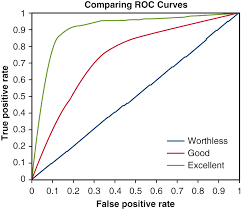 <br>
Bildquelle: [Linktext](https://jtcvs.org/article/S0022-5223(18)32875-7/fulltext)


Um mit der Bibliothek `sklearn.metrics.roc_curve(y, scores)` das Diagramm erstellen zu können, werden zunächst die Predictions benötigt, die Classifier liefert. Uns wird dann die False Positive Rate und die True Positive Rate als Arrays zurückgegeben, worüber wir das ROC Diagramm plotten können.

>Eingabeparameter: <br>
>`y - Unsere originalen Eingabedaten` <br>
 `scores - Unsere Predictions`

>Return <br>
>`False Positive Rate, True Positive Rate, Threshholds`


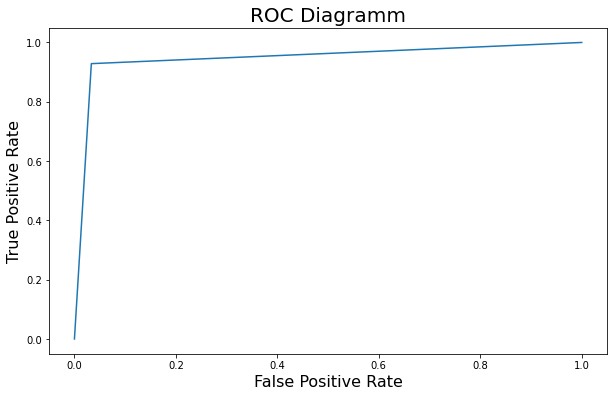

In [35]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Confusionmatrix erzeugen
cm = confusion_matrix(y, y_pred).ravel()

# ROC Curve Parameter erzeugen
fpr, tpr, thr = roc_curve(y, y_pred)

# Plott konfigurieren
plt.figure(figsize=(10,6))
plt.title("ROC Diagramm", fontsize=20)
plt.xlabel("False Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate", fontsize=16)

_ = plt.plot(fpr, tpr)

## Precision Recall Curve / PR Diagramm